In [1]:
#importing all the modules needed for this
from jmd_imagescraper.core import *
from pathlib import Path
from fastbook import *
from fastai.vision.widgets import *

In [7]:
#this creates a path variable to show the path for the images 
path = Path().cwd()/"Tumor_Images"

In [ ]:
#These are the search terms for what i am looking for
search_terms = ["tumor","no_tumor"]

In [14]:
#this tells us how many images we have in the file
files = get_image_files(path)
len(files)

2870

In [15]:
#this basically is the datablock function which takes in the data and organizes it. It also takes a part of that data for testing. 
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 get_y=parent_label,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 item_tfms=Resize(224))

In [17]:
# this creates dataloaders from path as defined by dblock
dls = dblock.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


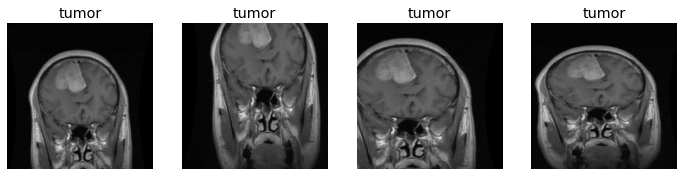

In [19]:
#this resizes the images for better results for prediciton
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
dls = dblock.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


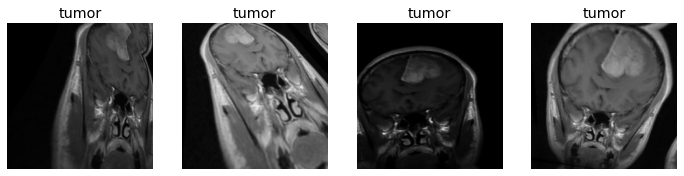

In [20]:
#This changes the angle that you look at it with the aug_transforms command. 
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [21]:
#this trains the resnet34 model it has 34 layers and it is a CNN (Convolutional neural network) It is really good for computer vision programs. 
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.950875,0.286170,0.886760,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.562863,0.308261,0.914634,00:39
1,0.392021,0.093022,0.982578,00:41
2,0.282436,0.157058,0.980836,00:42
3,0.191459,0.120938,0.982578,00:42


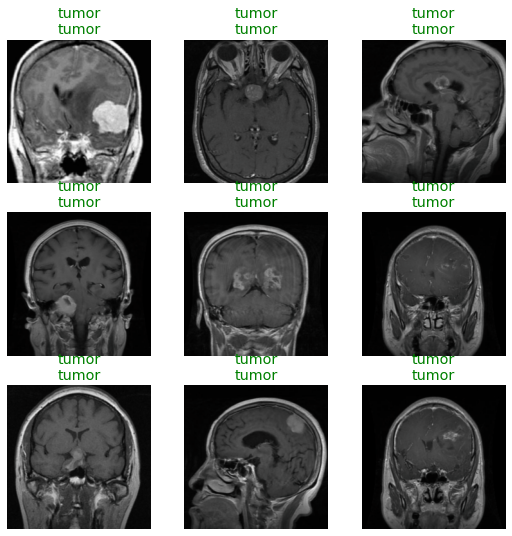

In [22]:
#this shows result using the testing part of the data.
learn.show_results()

In [23]:
#here we create an interpretation object to analyze the prediction
interp = ClassificationInterpretation.from_learner(learn)

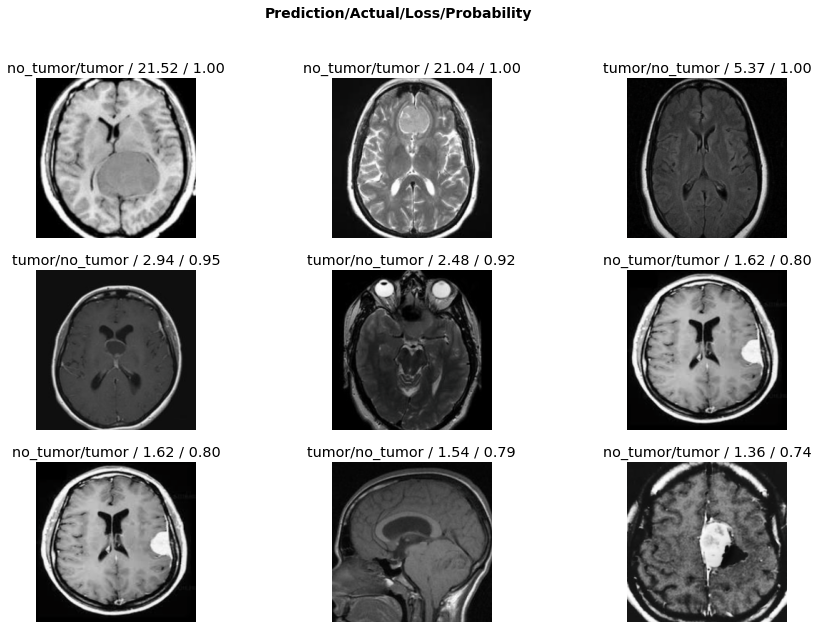

In [25]:
#this shows the ones that the AI had trouble with or was least certain about.
interp.plot_top_losses(9, figsize=(15,10))

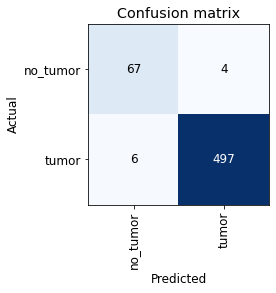

In [27]:
#This is used to tell us how many where correct and how many where correct
interp.plot_confusion_matrix()

In [ ]:
#to turn this into a usable app we can use this command. 
learn.export()

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
learn_inf = load_learner(path/'export.pkl')

In [31]:
learn_inf.dls.vocab

['no_tumor', 'tumor']

In [32]:
#to make an upload button we use a built in function from fastai
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [35]:
#this shows the image that was uploaded
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
#this is used to give us the output
pred,pred_idx,probs = learn_inf.predict(img)

In [37]:
#this gives us the output and the probability of it being correct
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: tumor; Probability: 0.9533')

In [38]:
#this is a button we will be using to classify our image if it is a tumor or if it isnt a tumor
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [39]:
#Now we make a function that would say what would happen when the Classify button is clicked.
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [40]:
btn_upload = widgets.FileUpload()

In [41]:
#Now we combine everything to create this nice GUI to classify if images of MRI scans of the brain contain tumors. 
VBox([widgets.Label('Select image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])